# 图像增强
在数据准备阶段，应用keras来进行数据增强。
## keras数据增强API
* 图像随机旋转rotate
* 图像随机偏移shift
* 图像随机推移shear
* Sample-wise图像像素标准化
* Feature-wise图像像素标准化
* ZCA白化转换
* 图像张量维度的重排序
* 存储增强图像数据
增强图像生成器可以透过以下方法创建：

datagen = ImageDataGenerator()

之后，就可以用数据来训练这个图像生成器，可以通过调用数据生成器的fit（）函数，来传送训练数据。
datagen.fit(train_data)

然后，通过调用flow()函数，配置批量返回的数据量大小，并获取图像数据。
x_batch,y_batch = datagen.flow(train,train,batch_size = 32)

最后，调用fit_generator()函数，并传送数据生成器实例（instance）、每个循环的步数和训练的循环总数(epochs)。

model.fit_generator(datagen.flow(X_train, Y_train,                        batch_size=batch_size),
               steps_per_epoch=len(X_train)/batch_size,
               epochs=nb_epoch)
               
[详细信息请查看官方文档。](https://keras.io/zh/preprocessing/image/)

In [39]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


In [40]:
import numpy as np
f = np.load(r'C:\Users\Zelon\KerasLearning\mnist.npz')

In [41]:
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()

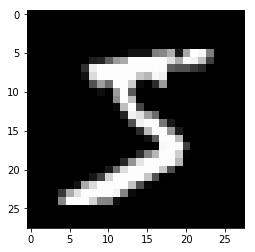

In [42]:
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
#plt.title(y_train[0])

In [43]:
plt.figure(figsize=(8,8))


<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

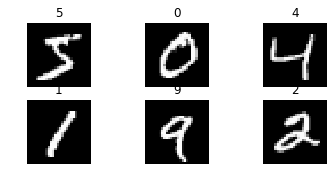

In [44]:
for i in range(0, 6):
    plt.subplot(330+1+i) # (331) -> 第一個子圖像, (332) -> 第二個子圖像
    plt.title(y_train[i])
    plt.axis('off')     #不顯示坐標
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

## 随机旋转图像
(这对当便是对象需要不同方向照片来训练的时候，有帮助)
* 将图像数据集进行维度调整，调整为：
[样本数，图像宽，图像高，图像频数] 

* 像素值类型调整：如果原来为整数型，要调整为浮点型
---------------------------------------------------------
* 定义图像增强产生器
* 使用图像增强产生器来训练实例数据
* 设定图像批次值，然后图像增强器会根据这个值返回生成的新数据。

In [59]:
X_train = x_train.reshape(x_train.shape[0],28,28,1)
X_train = X_train.astype('float32')

In [46]:
datagen = ImageDataGenerator(rotation_range=90)

In [47]:
datagen.fit(X_train)

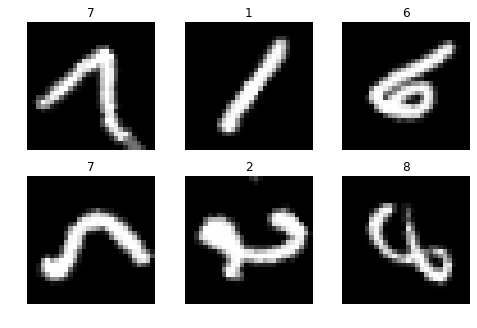

In [48]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    
    plt.figure(figsize=(8,8))
    for i in range(0,6):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

## 随机偏移
过程类似于图像旋转
* 需要设置偏移比例

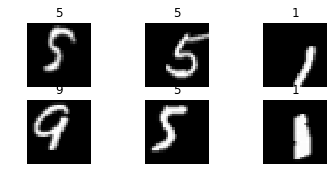

In [49]:
#-----------------------------------------------------
shift = 0.2  #偏移的比例
datagen = ImageDataGenerator(width_shift_range=shift,
                            height_shift_range=shift)
#-----------------------------------------------------
datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9): 
    for i in range(0,6):        
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

## 随机推移错切
* 需要设置错切强度/错切范围

In [50]:
#-----------------------------------------------------
shear_range = 1.25
datagen = ImageDataGenerator(shear_range=shear_range)
#-----------------------------------------------------
datagen.fit(X_train)

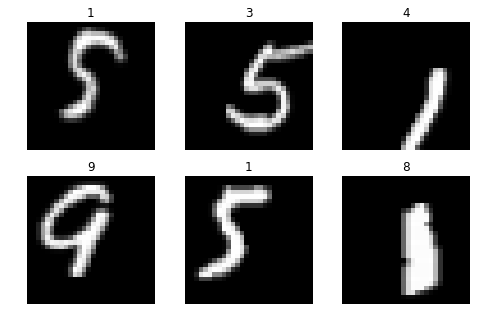

In [51]:
for X_train,y_batch in datagen.flow(X_train,y_train,batch_size=9):
    plt.figure(figsize=(8,8))
    for i in range(0,6):
        plt.subplot(331 + i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break


## 随机镜像翻转
* 定义图像数据增强产生器参数：水平倾斜，和垂直倾斜

In [60]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)


X_train = x_train.reshape(x_train.shape[0],28,28,1)
X_train = X_train.astype('float32')

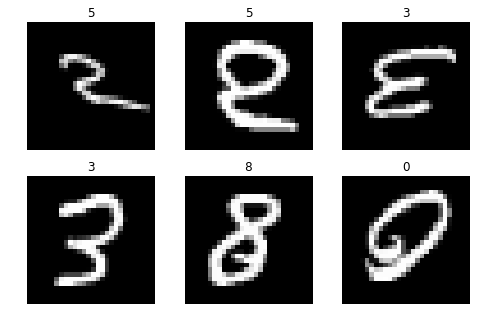

In [61]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8,8))
    for i in range(0,6):
        plt.subplot(331 + i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

## 影像特征标准化
把整个数据集的像素进行标准化(standardize pixel)
* 通过ImageDataGenerator的参数featurewise_center和featurewise_std_normalization设置标准化。

In [62]:
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)
datagen.fit(X_train)

X_train = x_train.reshape(x_train.shape[0],28,28,1)
X_train = X_train.astype('float32')

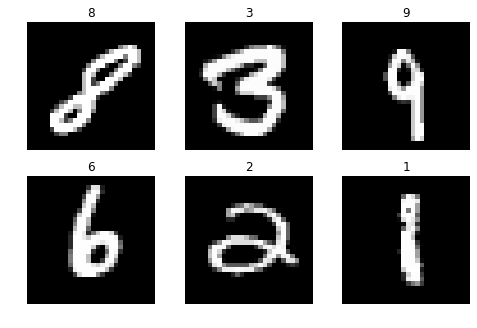

In [63]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8,8))
    for i in range(0,6):
        plt.subplot(331 + i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

## ZCA百花转换
目的：出去数据冗余/相关性，突出图像中的结构和特征。
* 通过设置ImageDataGenerator的参数zca_whitening来实现

In [65]:


datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train)


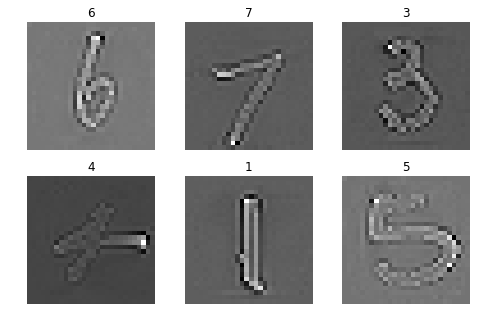

In [66]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8,8))
    for i in range(0,6):
        plt.subplot(331 + i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28,28),cmap=plt.get_cmap('gray'))
    plt.show()
    break

## 存储增强后的图像
* datagen.flow函数中，设置目录参数save_to_dir，参数save_prefix和图像文件格式参数save_format
进行保存